         PC1       PC2
0  -0.526258  5.566278
1   1.016687  3.352036
2   1.058280  1.844760
3  -0.173012  1.540431
4  -0.280666  1.219715
..       ...       ...
78  0.724850 -3.055172
79  0.965500 -3.437027
80  0.177245 -3.400804
81  0.471616 -2.909196
82  0.042004 -2.488026

[83 rows x 2 columns]


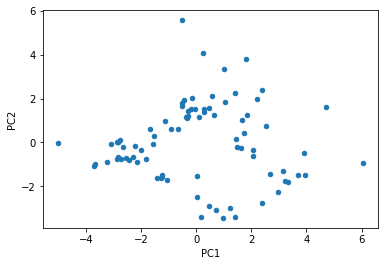

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

dataA = pd.read_csv('../5. Dataset PCA/MeterA_pca_all.csv')
dataA_feature = dataA[['PC1','PC2']]
print(dataA_feature)
_ = dataA_feature.plot.scatter(x='PC1',y='PC2')

In [2]:
# scaler = MinMaxScaler()
# scaler.fit(dataA_feature.PC1)
# dataA_feature.PC1 = scaler.transform(dataA_feature.PC1)

# # scaler.fit(dataA_feature['PC2'])
# # dataA_feature['PC2'] = scaler.transform(dataA_feature['PC2'])
# dataA_feature

In [3]:
km = KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [4]:
y_predict = km.fit_predict(dataA_feature[['PC1','PC2']])
dataA_feature['Cluster'] = y_predict+1
dataA_feature

<ipython-input-4-9ea8584dc15b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataA_feature['Cluster'] = y_predict+1


,PC1,PC2,Cluster
0,-0.526258,5.566278,2
1,1.016687,3.352036,2
2,1.058280,1.844760,2
3,-0.173012,1.540431,2
4,-0.280666,1.219715,2
...,...,...,...
78,0.724850,-3.055172,1
79,0.965500,-3.437027,1
80,0.177245,-3.400804,1
81,0.471616,-2.909196,1


In [5]:
km.cluster_centers_

array([[ 2.20460435, -1.02267195],
       [-1.24788926,  0.57887092]])

No handles with labels found to put in legend.


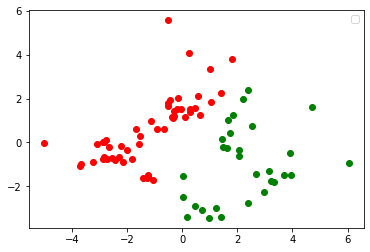

In [6]:
df1 = dataA_feature[dataA_feature.Cluster==1]
df2 = dataA_feature[dataA_feature.Cluster==2]
plt.scatter(df1['PC1'],df1['PC2'],color='green')
plt.scatter(df2['PC1'],df2['PC2'],color='red')
plt.legend()

In [7]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dataA_feature[['PC1','PC2']])
    sse.append(km.inertia_)

C:\Users\joshh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
sse

[659.4820663325797,
 382.00500426626627,
 197.197330461564,
 142.35198930120245,
 115.39457366770098,
 87.83791496219023,
 73.05010471207804,
 61.126634264118586,
 49.992462534994736]

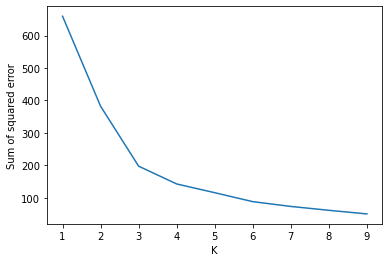

In [9]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)